# Sign Language Model Training for Numbers

Building a model that will recognize a digit for sign language


## Load all required imports and defining IMG_SIZE

In [72]:
# General-purpose imports
import cv2  # OpenCV for image processing
import os   # Operating system functionalities
import time  # Time-related functions
import random  # Random number generation
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Plotting library
from sklearn.metrics import confusion_matrix  # Evaluation metric for classification
import itertools  # Functions for creating iterators for efficient looping
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
import tensorflow as tf  # TensorFlow for deep learning
from tqdm import tqdm # Progress bar for tasks
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential  # Sequential model for stacking layers

from tensorflow.keras.layers import (  # Layers for building the model
    Dense, Dropout, Activation, Flatten, BatchNormalization,
    Conv2D, MaxPooling2D
)
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping  # Callbacks for model training

from tensorflow.keras.models import Sequential  # Sequential model for stacking layers
from tensorflow.keras.layers import (  # Layers for building the model
    Flatten, Dense, Dropout, BatchNormalization
)
from tensorflow.keras.optimizers import Adam  # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  # Callbacks for model training
import numpy as np  # NumPy for numerical operations

IMG_SIZE = 64


## Defining Data directory and Categories for images

In [73]:
DATADIR = r"Sign Language for Numbers/"
CATEGORIES = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "unknown"]



## Creating training data

In [150]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # Iterate over each category (1, 2, 3, 4, 5, 6, 7, 8, 9, unknown)

        path = os.path.join(DATADIR, category)  # Create path to categories
        class_num = CATEGORIES.index(category)  # Get the classification index

        for img in tqdm(os.listdir(path)):  # Iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  # Convert image to array
                new_image_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # Resize image to normalize data size
                training_data.append([new_image_array, class_num])  # Add image and class index to training_data

                # Mirror the image horizontally
                mirrored_image_array = cv2.flip(new_image_array, 1)
                training_data.append([mirrored_image_array, class_num])  # Add mirrored image and class index to training_data
            except Exception as e:
                pass

create_training_data()  # Call the function to create training data


100%|██████████| 1500/1500 [00:01<00:00, 1322.72it/s]


In [151]:
#printing the length of the training data and the number of classes and images per class
print("Length of training data:", len(training_data))
print("Number of classes:", len(CATEGORIES))
print("Images per class:", len(training_data) / len(CATEGORIES))


Length of training data: 33000
Number of classes: 11
Images per class: 3000.0


## Shuffle

In [152]:
random.shuffle(training_data)

# Check if shuffle is working
for sample in training_data[:10]:
    print(sample[1])

1
3
3
3
5
4
6
0
10
8


## Appending data into X and Y lists

In [153]:
X = [] # Initialize an empty list for features
Y = [] # Initialize an empty list for labels

# Loop through the training data
for features,label in training_data:
    X.append(features) # Append the features to the X list
    Y.append(label) # Append the label to the Y list

# Reshape all features to a 4D array, suitable for input to a Convolutional Neural Network
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

## Pickle

In [154]:
import pickle

pickle_out = open("logs/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("logs/Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

## Start Training

In [130]:
# Load pickel data
pickle_in = open("/kaggle/working/X.pickle","rb")
X = pickle.load(pickle_in)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

pickle_in = open("/kaggle/working/Y.pickle","rb")
Y = pickle.load(pickle_in)
Y = np.array(Y)

X = X/255.0

model = Sequential()
# 3 Convolutional Layers
model.add(Conv2D(16, (2,2), input_shape=X.shape[1:], activation='relu')) # Add a convolutional layer with 16 filters and a 2x2 kernel size
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')) # Add a max pooling layer with a pool size of 2x2 and stride of 2x2
model.add(Conv2D(32, (3,3), activation='relu')) # Add a convolutional layer with 32 filters and a 3x3 kernel size
model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same')) # Add a max pooling layer with a pool size of 3x3 and stride of 3x3
model.add(Conv2D(64, (5,5), activation='relu')) # Add a convolutional layer with 64 filters and a 5x5 kernel size
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same')) # Add a max pooling layer with a pool size of 5x5 and stride of 5x5
# 2 Hidden Layers
model.add(Flatten()) # Flatten the input
model.add(Dense(128, activation='relu')) # Add a fully connected layer with 128 units and ReLU activation
model.add(Dropout(0.2)) # Add a dropout layer with a rate of 0.2
model.add(Dense(11, activation='softmax')) # Add a fully connected layer with 11 units (equal to the number of classes) and softmax activation
# Compile Model

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X, Y, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
413/413 [==============================] - 10s 21ms/step - loss: 1.6781 - accuracy: 0.4142 - val_loss: 0.8032 - val_accuracy: 0.7567
Epoch 2/10
413/413 [==============================] - 9s 22ms/step - loss: 0.6347 - accuracy: 0.7942 - val_loss: 0.5168 - val_accuracy: 0.8355
Epoch 3/10
413/413 [==============================] - 11s 26ms/step - loss: 0.3925 - accuracy: 0.8770 - val_loss: 0.3648 - val_accuracy: 0.8879
Epoch 4/10
413/413 [==============================] - 9s 23ms/step - loss: 0.2758 - accuracy: 0.9132 - val_loss: 0.3126 - val_accuracy: 0.9036
Epoch 5/10
413/413 [==============================] - 9s 21ms/step - loss: 0.2107 - accuracy: 0.9322 - val_loss: 0.2712 - val_accuracy: 0.9127
Epoch 6/10
413/413 [==============================] - 8s 20ms/step - loss: 0.1700 - accuracy: 0.9445 - val_loss: 0.2201 - val_accuracy: 0.9324
Epoch 7/10
413/413 [==============================] - 9s 21ms/step - loss: 0.1321 - accuracy: 0.9573 - val_loss: 0.2819 - val_accuracy: 0.91

In [131]:
# Summarize the model to see number of parameters and output shape
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 63, 63, 16)        80        
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 32, 32, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_61 (Conv2D)          (None, 30, 30, 32)        4640      
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 10, 10, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_62 (Conv2D)          (None, 6, 6, 64)          51264     
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 2, 2, 64)        

In [132]:
# Predict the values from the validation dataset
Y_pred = model.predict(X)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = Y

# Print the classification report
print(classification_report(Y_true, Y_pred_classes))


516/516 [==============================] - 4s 7ms/step
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1500
           1       0.98      0.99      0.98      1500
           2       0.97      0.97      0.97      1500
           3       0.98      0.99      0.99      1500
           4       0.98      0.99      0.98      1500
           5       0.99      0.99      0.99      1500
           6       0.98      0.98      0.98      1500
           7       0.99      0.97      0.98      1500
           8       0.99      0.99      0.99      1500
           9       1.00      0.99      0.99      1500
          10       0.93      0.99      0.96      1500

    accuracy                           0.98     16500
   macro avg       0.98      0.98      0.98     16500
weighted avg       0.98      0.98      0.98     16500



In [133]:
# Save model
model.save("Models/Model_1.h5")


c:\Users\nitro\OneDrive\Desktop\Final_Computer_Vision\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Predicting random images

In [134]:
def predict_random_images(model, categories, test_folder, num_images):
    
    # Get the list of subfolders in the test folder
    subfolders = os.listdir(test_folder)

    # Select random subfolders
    random_subfolders = random.sample(subfolders, num_images)

    for subfolder in random_subfolders:
        # Get the path to the subfolder
        subfolder_path = os.path.join(test_folder, subfolder)

        # Get the list of images in the subfolder
        images = os.listdir(subfolder_path)

        # Select a random image
        random_image = random.choice(images)

        # Get the path to the random image
        random_image_path = os.path.join(subfolder_path, random_image)

        # Load the image and preprocess it
        img = cv2.imread(random_image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
        img = img / 255.0

        # Predict the class of the image using the trained model
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)

        # Print the predicted class and the actual class
        print("Predicted class:", categories[predicted_class])
        print("Actual class:", subfolder)

        # Show the image
        plt.imshow(img.reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
        plt.axis('off')
        plt.show()


1/1 [==============================] - 0s 52ms/step
Predicted class: 7
Actual class: 7


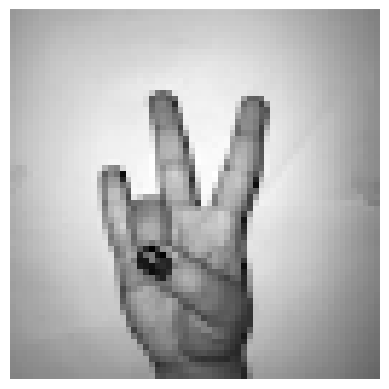

1/1 [==============================] - 0s 32ms/step
Predicted class: 4
Actual class: 4


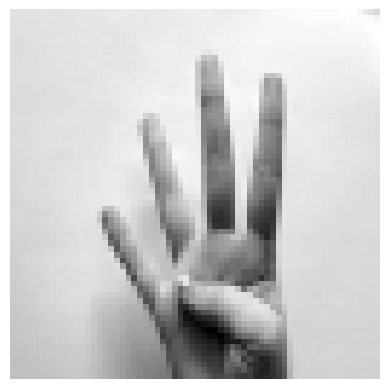

1/1 [==============================] - 0s 33ms/step
Predicted class: 2
Actual class: 2


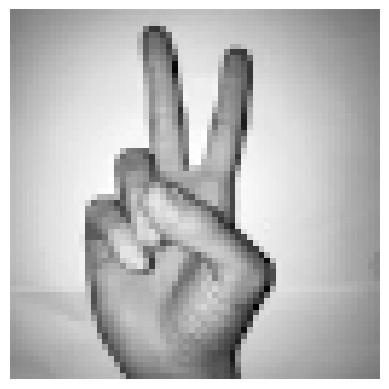

1/1 [==============================] - 0s 39ms/step
Predicted class: 6
Actual class: 6


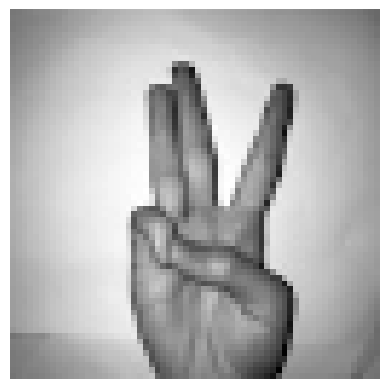

1/1 [==============================] - 0s 28ms/step
Predicted class: 0
Actual class: 0


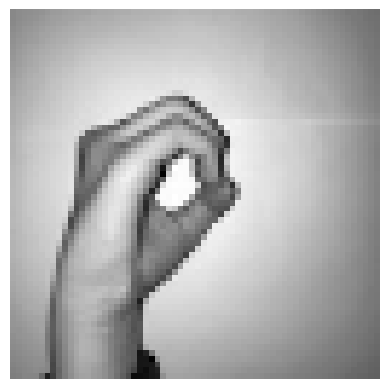

In [135]:
DATADIR_RANDOM = r"test/"
predict_random_images(model, CATEGORIES, DATADIR_RANDOM, 5)

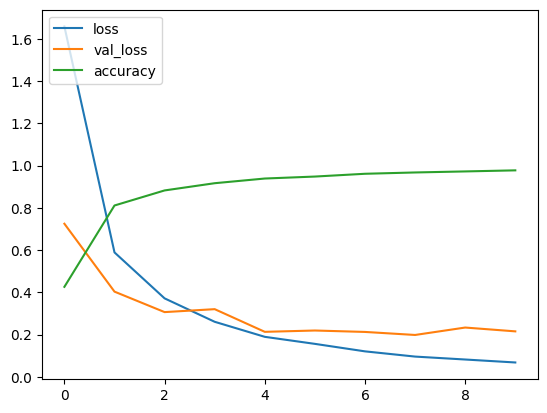

In [85]:
#plot losses and accuracy

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy'], loc='upper left')
plt.show()



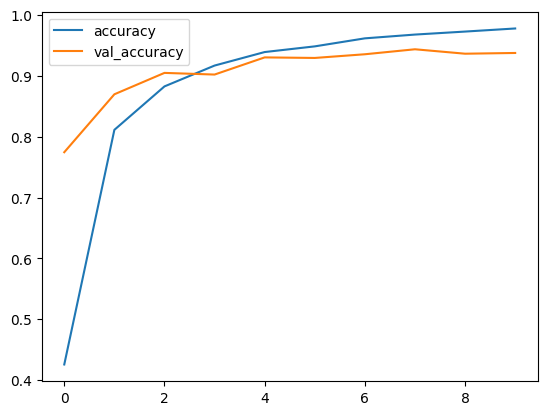

In [86]:
#plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

## Confusion Matrix

516/516 [==============================] - 4s 7ms/step
[[1417    2    1    2    0    3    1    0    3    0   71]
 [   0 1476   11    1    0    0    1    3    2    0    6]
 [   0    3 1466    3    1    0    9    6    1    0   11]
 [   0    1    2 1485    1    6    0    1    0    0    4]
 [   0    0    0    3 1434   12    4   36    6    4    1]
 [   0    0    0    5    1 1485    0    0    0    1    8]
 [   0    0    9    1    3    0 1474    8    1    0    4]
 [   1    0    3    0    2    0    1 1476   12    1    4]
 [   0    0    0    0    1    0    1    6 1488    1    3]
 [   1    0    0    0    2    5    0    1    9 1477    5]
 [   3    1    3    5    0    3    1    0    6    0 1478]]


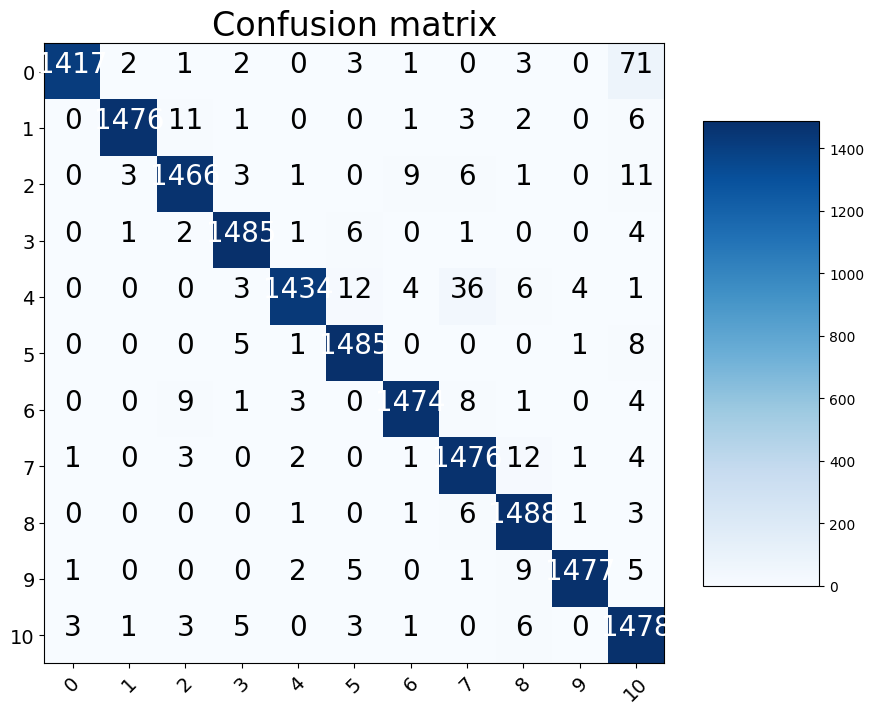

In [87]:
#confusion matrix


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size=14)

    if normalize:
        cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.

    # Label the plot.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = 'white' if cm[i, j] > threshold else 'black'
        plt.text(j, i, cm[i, j], horizontalalignment='center', color=color, size=20)



# Predict the values from the validation dataset
Y_pred = model.predict(X)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = Y

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
#print a heatmap of the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(11))


## Trying to Improve Model


Data augmentation

In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Assuming X and Y are your input data and labels
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an instance of the ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create an instance of the ImageDataGenerator for validation data (without augmentation)
val_datagen = ImageDataGenerator()

# Generate augmented images from the training data
train_augmented_data = train_datagen.flow(X_train, Y_train, batch_size=32)

# Generate non-augmented images for validation data
val_data = val_datagen.flow(X_val, Y_val, batch_size=32)

# Train the model using augmented data and validation data
history = model.fit(
    train_augmented_data,
    epochs=20,
    validation_data=val_data  # Use the validation data generator here
)


Epoch 1/20
413/413 [==============================] - 14s 32ms/step - loss: 1.3132 - accuracy: 0.5798 - val_loss: 0.3099 - val_accuracy: 0.9170
Epoch 2/20
413/413 [==============================] - 13s 32ms/step - loss: 0.8786 - accuracy: 0.7055 - val_loss: 0.2649 - val_accuracy: 0.9191
Epoch 3/20
413/413 [==============================] - 13s 32ms/step - loss: 0.7495 - accuracy: 0.7503 - val_loss: 0.3082 - val_accuracy: 0.9076
Epoch 4/20
413/413 [==============================] - 13s 32ms/step - loss: 0.6724 - accuracy: 0.7727 - val_loss: 0.2175 - val_accuracy: 0.9342
Epoch 5/20
413/413 [==============================] - 13s 32ms/step - loss: 0.6123 - accuracy: 0.7967 - val_loss: 0.2163 - val_accuracy: 0.9400
Epoch 6/20
413/413 [==============================] - 14s 33ms/step - loss: 0.5665 - accuracy: 0.8098 - val_loss: 0.2147 - val_accuracy: 0.9339
Epoch 7/20
413/413 [==============================] - 13s 32ms/step - loss: 0.5504 - accuracy: 0.8167 - val_loss: 0.2149 - val_accuracy:

In [89]:
# Predict the values from the validation dataset
Y_pred = model.predict(X)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = Y

# Print the classification report
print(classification_report(Y_true, Y_pred_classes))


516/516 [==============================] - 4s 7ms/step
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1500
           1       0.99      0.95      0.97      1500
           2       0.94      0.94      0.94      1500
           3       0.99      0.95      0.97      1500
           4       0.96      0.93      0.95      1500
           5       0.98      0.99      0.98      1500
           6       0.93      0.97      0.95      1500
           7       0.97      0.94      0.95      1500
           8       0.96      0.97      0.97      1500
           9       0.97      0.96      0.97      1500
          10       0.88      0.99      0.93      1500

    accuracy                           0.96     16500
   macro avg       0.96      0.96      0.96     16500
weighted avg       0.96      0.96      0.96     16500



In [90]:
model.save("Models/Model_2.h5")

c:\Users\nitro\OneDrive\Desktop\Final_Computer_Vision\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


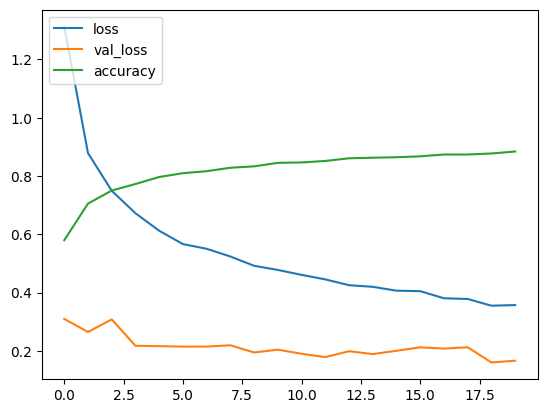

In [91]:
#plot losses and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy'], loc='upper left')
plt.show()

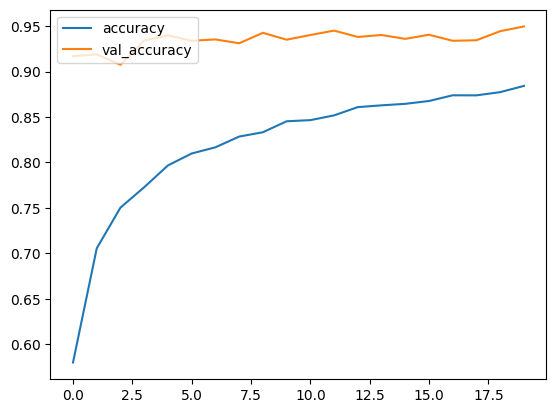

In [92]:
#plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

516/516 [==============================] - 4s 7ms/step
[[1408    2    4    0    0    2    0    0    1    0   83]
 [   5 1429   22    0    0    2    3    1    2    1   35]
 [   2    7 1411    2    1    0   42    9    1    5   20]
 [   1    2    8 1430    5    5    3    3    4   25   14]
 [   0    0   18    4 1402   12   41    7    0    5   11]
 [   0    0    0    3    4 1481    0    0    1    2    9]
 [   1    0    9    1   15    1 1457    4    1    5    6]
 [   0    1   25    1   17    0   15 1408   27    1    5]
 [   2    0    2    0    2    1    5   18 1458    2   10]
 [   0    0    2    0   11    7    5    5   24 1442    4]
 [   9    1    4    1    3    2    0    0    2    0 1478]]


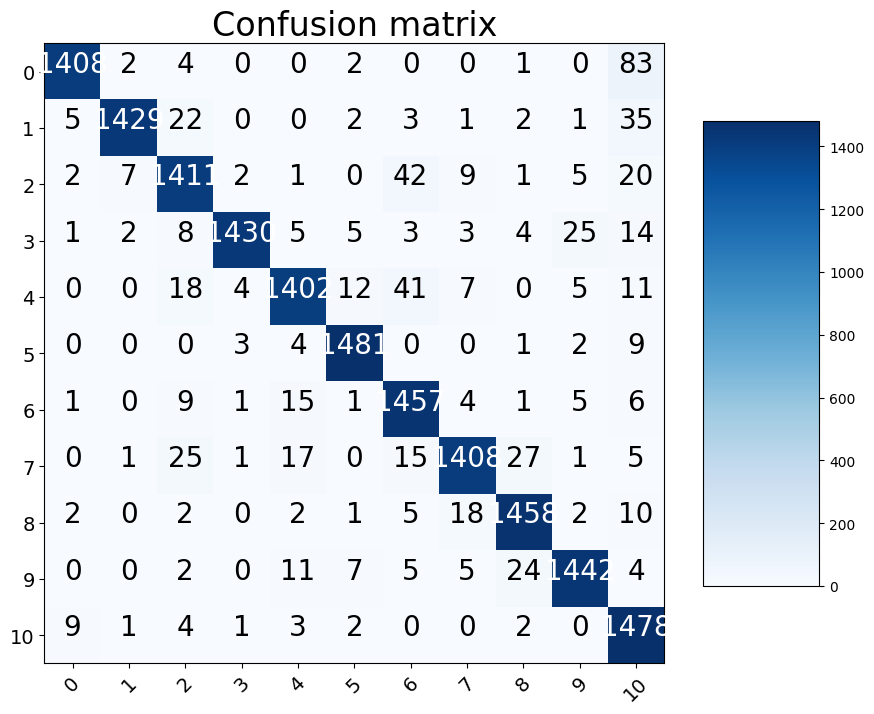

In [93]:
#predict the values from the validation dataset
Y_pred = model.predict(X)
#convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
#convert validation observations to one hot vectors
Y_true = Y

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
#print a heatmap of the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(11))

## Adding batch normalization, dropout, early stopping

In [112]:


NAME = "Numbers_CNN_Model_{}".format(time.strftime("%Y%m%d-%H%M%S")) 
pickle_in = open("logs/X.pickle","rb")
X = pickle.load(pickle_in)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
pickle_in = open("logs/Y.pickle","rb")
Y = pickle.load(pickle_in)
Y = np.array(Y)
X = X/255.0

model = Sequential()

model.add(Conv2D(16, (2,2), input_shape=X.shape[1:], activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11, activation='softmax')) # size must be equal to number of classes i.e. 11

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history =  model.fit(X, Y, batch_size=32, epochs=10, validation_split=0.2, callbacks=[tensorboard, early_stopping])


Epoch 1/10
825/825 [==============================] - 27s 30ms/step - loss: 1.0901 - accuracy: 0.6410 - val_loss: 0.5519 - val_accuracy: 0.8165
Epoch 2/10
825/825 [==============================] - 25s 30ms/step - loss: 0.3915 - accuracy: 0.8715 - val_loss: 0.2965 - val_accuracy: 0.9024
Epoch 3/10
825/825 [==============================] - 23s 28ms/step - loss: 0.2381 - accuracy: 0.9223 - val_loss: 0.3424 - val_accuracy: 0.8847
Epoch 4/10
825/825 [==============================] - 23s 28ms/step - loss: 0.1718 - accuracy: 0.9425 - val_loss: 0.2902 - val_accuracy: 0.9042
Epoch 5/10
825/825 [==============================] - 24s 29ms/step - loss: 0.1321 - accuracy: 0.9552 - val_loss: 0.2201 - val_accuracy: 0.9330
Epoch 6/10
825/825 [==============================] - 23s 28ms/step - loss: 0.1068 - accuracy: 0.9645 - val_loss: 0.2009 - val_accuracy: 0.9353
Epoch 7/10
825/825 [==============================] - 23s 28ms/step - loss: 0.0946 - accuracy: 0.9689 - val_loss: 0.5139 - val_accuracy:

In [113]:
# Predict the values from the validation dataset
Y_pred = model.predict(X)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = Y

# Print the classification report
print(classification_report(Y_true, Y_pred_classes))


1032/1032 [==============================] - 11s 11ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3000
           1       0.96      1.00      0.98      3000
           2       0.97      0.97      0.97      3000
           3       0.98      0.99      0.99      3000
           4       0.99      0.97      0.98      3000
           5       0.99      1.00      0.99      3000
           6       0.99      0.96      0.98      3000
           7       0.95      0.98      0.97      3000
           8       1.00      0.95      0.97      3000
           9       0.98      0.99      0.99      3000
          10       0.97      0.99      0.98      3000

    accuracy                           0.98     33000
   macro avg       0.98      0.98      0.98     33000
weighted avg       0.98      0.98      0.98     33000



In [114]:
model.save("Models/Model_3.h5")

c:\Users\nitro\OneDrive\Desktop\Final_Computer_Vision\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


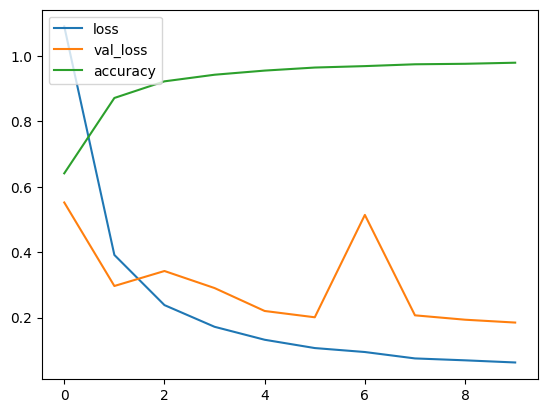

In [115]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy'], loc='upper left')
plt.show()

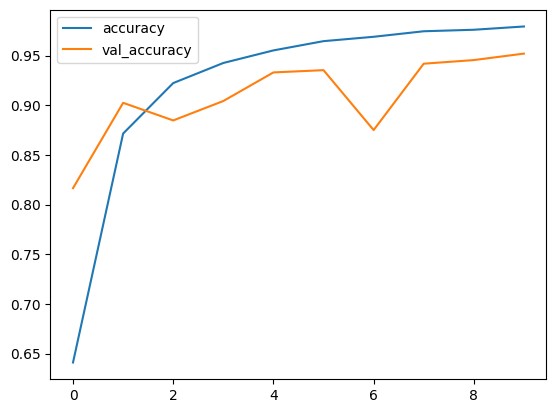

In [116]:
#plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

1032/1032 [==============================] - 10s 10ms/step
[[2953    9    2    0    0    1    0    0    2    0   33]
 [   0 2992    1    0    0    0    0    1    0    0    6]
 [   5   47 2898   15    0    0    4    2    0    2   27]
 [   0    2    8 2974    2    4    0    3    1    2    4]
 [   2    1    2   10 2921   18    8   19    2   17    0]
 [   0    0    1    9    1 2987    0    0    0    1    1]
 [   0    2   44    5   17    1 2890   25    0    5   11]
 [   0    9   10   10    4    0    5 2944    5    4    9]
 [   0   21    1    1    6    0    0   97 2839   28    7]
 [   0    8    4    9    2    2    0    6    0 2969    0]
 [  20   11    2    4    0    3    0    1    1    0 2958]]


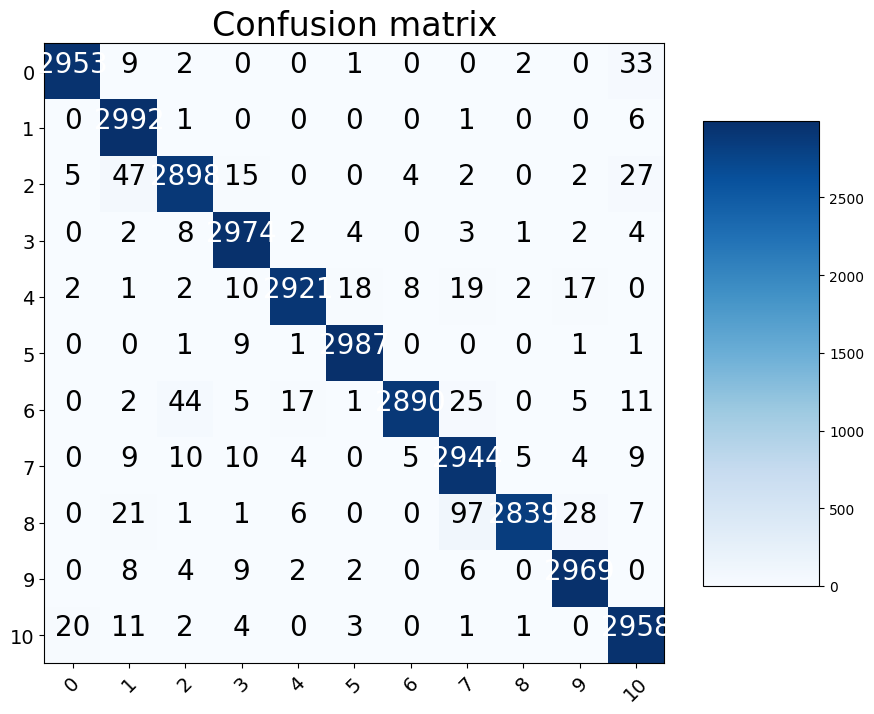

In [117]:
#predict the values from the validation dataset
Y_pred = model.predict(X)
#convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
#convert validation observations to one hot vectors
Y_true = Y

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
#print a heatmap of the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(11))

## Transfer Learning using vgg16 pretrained on imagenet

In [118]:
from tensorflow.keras.applications import VGG16

# Load pickel data
pickle_in = open(r"C:\Users\nitro\OneDrive\Desktop\Final_Computer_Vision\logs/X.pickle","rb")
X = pickle.load(pickle_in)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

pickle_in = open(r"C:\Users\nitro\OneDrive\Desktop\Final_Computer_Vision\logs/Y.pickle","rb")
Y = pickle.load(pickle_in)
Y = np.array(Y)

X = X/255.0

# Load the VGG16 model pretrained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(11, activation='softmax'))

optimizer = Adam(learning_rate=0.001)  
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

X_rgb = np.repeat(X, 3, axis=-1)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
history = model.fit(X_rgb, Y, batch_size=32, epochs=10, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])


Epoch 1/10
825/825 [==============================] - 433s 522ms/step - loss: 0.8067 - accuracy: 0.7513 - val_loss: 0.8439 - val_accuracy: 0.7174
Epoch 2/10


c:\Users\nitro\OneDrive\Desktop\Final_Computer_Vision\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


825/825 [==============================] - 429s 520ms/step - loss: 0.4677 - accuracy: 0.8568 - val_loss: 0.5247 - val_accuracy: 0.8497
Epoch 3/10
825/825 [==============================] - 427s 517ms/step - loss: 0.3850 - accuracy: 0.8800 - val_loss: 0.4123 - val_accuracy: 0.8782
Epoch 4/10
825/825 [==============================] - 427s 517ms/step - loss: 0.3524 - accuracy: 0.8909 - val_loss: 0.4838 - val_accuracy: 0.8433
Epoch 5/10
825/825 [==============================] - 431s 522ms/step - loss: 0.3153 - accuracy: 0.9009 - val_loss: 0.3760 - val_accuracy: 0.8862
Epoch 6/10
825/825 [==============================] - 427s 518ms/step - loss: 0.2995 - accuracy: 0.9039 - val_loss: 0.4121 - val_accuracy: 0.8635
Epoch 7/10
825/825 [==============================] - 428s 519ms/step - loss: 0.2836 - accuracy: 0.9111 - val_loss: 0.3426 - val_accuracy: 0.8982
Epoch 8/10
825/825 [==============================] - 430s 521ms/step - loss: 0.2731 - accuracy: 0.9118 - val_loss: 0.7491 - val_accura

In [120]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_rgb)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = Y

# Print the classification report
print(classification_report(Y_true, Y_pred_classes))


1032/1032 [==============================] - 428s 414ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3000
           1       0.93      0.98      0.96      3000
           2       0.91      0.90      0.91      3000
           3       0.80      0.99      0.88      3000
           4       0.73      0.96      0.83      3000
           5       1.00      0.92      0.96      3000
           6       0.95      0.89      0.92      3000
           7       0.91      0.74      0.82      3000
           8       0.98      0.72      0.83      3000
           9       0.96      0.93      0.95      3000
          10       0.97      0.97      0.97      3000

    accuracy                           0.91     33000
   macro avg       0.92      0.91      0.91     33000
weighted avg       0.92      0.91      0.91     33000



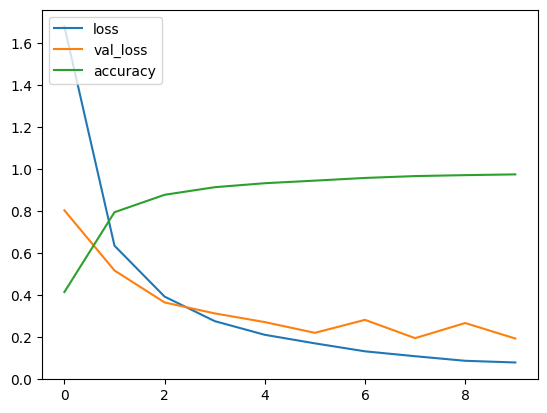

In [139]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy'], loc='upper left')
plt.show()

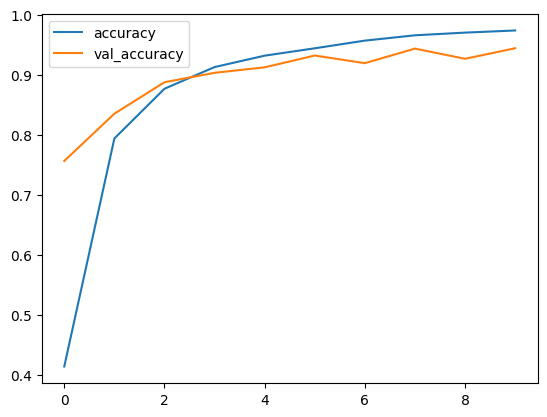

In [140]:
#plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

In [121]:
model.save("Models/Model_4.h5")


c:\Users\nitro\OneDrive\Desktop\Final_Computer_Vision\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [122]:
# Unfreeze the last few layers of the base model
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Train the model with fine-tuning
history = model.fit(X_rgb, Y, batch_size=32, epochs=10, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])


Epoch 1/10
825/825 [==============================] - 549s 662ms/step - loss: 0.4188 - accuracy: 0.8728 - val_loss: 0.2973 - val_accuracy: 0.9097
Epoch 2/10
825/825 [==============================] - 536s 649ms/step - loss: 0.1391 - accuracy: 0.9555 - val_loss: 0.1941 - val_accuracy: 0.9394
Epoch 3/10
825/825 [==============================] - 536s 649ms/step - loss: 0.0914 - accuracy: 0.9708 - val_loss: 0.2256 - val_accuracy: 0.9338
Epoch 4/10
825/825 [==============================] - 537s 651ms/step - loss: 0.0588 - accuracy: 0.9807 - val_loss: 0.1738 - val_accuracy: 0.9485
Epoch 5/10
825/825 [==============================] - 537s 651ms/step - loss: 0.0585 - accuracy: 0.9816 - val_loss: 0.1156 - val_accuracy: 0.9626
Epoch 6/10
825/825 [==============================] - 536s 650ms/step - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.0960 - val_accuracy: 0.9723
Epoch 7/10
825/825 [==============================] - 535s 648ms/step - loss: 0.0453 - accuracy: 0.9858 - val_loss: 0.0738 -

In [123]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_rgb)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = Y

# Print the classification report
print(classification_report(Y_true, Y_pred_classes))


1032/1032 [==============================] - 422s 409ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3000
           1       0.99      0.99      0.99      3000
           2       0.99      0.99      0.99      3000
           3       1.00      0.99      0.99      3000
           4       0.99      1.00      0.99      3000
           5       1.00      1.00      1.00      3000
           6       0.99      0.98      0.99      3000
           7       0.99      0.97      0.98      3000
           8       0.96      0.99      0.98      3000
           9       1.00      0.98      0.99      3000
          10       1.00      0.99      0.99      3000

    accuracy                           0.99     33000
   macro avg       0.99      0.99      0.99     33000
weighted avg       0.99      0.99      0.99     33000



In [124]:
model.save("Models/Model_5.h5")

c:\Users\nitro\OneDrive\Desktop\Final_Computer_Vision\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Transfer learning using MobileNetV2

In [125]:
from tensorflow.keras.applications import MobileNetV2


# Load the MobileNetV2 model pretrained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(11, activation='softmax'))

optimizer = Adam(learning_rate=0.001)  
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

X_rgb = np.repeat(X, 3, axis=-1)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
history = model.fit(X_rgb, Y, batch_size=32, epochs=10, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])


Epoch 1/10
825/825 [==============================] - 64s 64ms/step - loss: 0.8124 - accuracy: 0.7396 - val_loss: 0.4993 - val_accuracy: 0.8447
Epoch 2/10
825/825 [==============================] - 47s 57ms/step - loss: 0.4513 - accuracy: 0.8547 - val_loss: 0.4248 - val_accuracy: 0.8630
Epoch 3/10
825/825 [==============================] - 48s 58ms/step - loss: 0.3374 - accuracy: 0.8876 - val_loss: 0.3749 - val_accuracy: 0.8795
Epoch 4/10
825/825 [==============================] - 49s 59ms/step - loss: 0.2749 - accuracy: 0.9077 - val_loss: 0.3697 - val_accuracy: 0.8833
Epoch 5/10
825/825 [==============================] - 48s 58ms/step - loss: 0.2280 - accuracy: 0.9217 - val_loss: 0.3586 - val_accuracy: 0.8882
Epoch 6/10
825/825 [==============================] - 47s 57ms/step - loss: 0.1920 - accuracy: 0.9365 - val_loss: 0.3280 - val_accuracy: 0.8982
Epoch 7/10
825/825 [==============================] - 48s 58ms/step - loss: 0.1744 - accuracy: 0.9407 - val_loss: 0.3427 - val_accuracy:

In [126]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_rgb)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = Y

# Print the classification report
print(classification_report(Y_true, Y_pred_classes))


1032/1032 [==============================] - 48s 45ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3000
           1       0.97      0.97      0.97      3000
           2       0.93      0.95      0.94      3000
           3       0.97      0.97      0.97      3000
           4       0.97      0.94      0.96      3000
           5       0.98      0.98      0.98      3000
           6       0.94      0.96      0.95      3000
           7       0.93      0.94      0.94      3000
           8       0.95      0.94      0.94      3000
           9       0.96      0.96      0.96      3000
          10       0.98      0.98      0.98      3000

    accuracy                           0.96     33000
   macro avg       0.96      0.96      0.96     33000
weighted avg       0.96      0.96      0.96     33000



In [127]:
#save model
model.save("Models/Model_6.h5")

c:\Users\nitro\OneDrive\Desktop\Final_Computer_Vision\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def convert_model_to_tflite(model_path, tflite_path):
    model = tf.keras.models.load_model(model_path)
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    open(tflite_path, "wb").write(tflite_model)

models = ["Models/Model_1.h5", "Models/Model_2.h5", "Models/Model_3.h5", "Models/Model_4.h5", "Models/Model_5.h5", "Models/Model_6.h5"]
tflite_models = ["model_1.tflite", "model_2.tflite", "model_3.tflite", "model_4.tflite", "model_5.tflite", "model_6.tflite"]

for model_path, tflite_path in zip(models, tflite_models):
    convert_model_to_tflite(model_path, tflite_path)


INFO:tensorflow:Assets written to: C:\Users\nitro\AppData\Local\Temp\tmp_xdc95zp\assets


INFO:tensorflow:Assets written to: C:\Users\nitro\AppData\Local\Temp\tmp_xdc95zp\assets


INFO:tensorflow:Assets written to: C:\Users\nitro\AppData\Local\Temp\tmpt8vwk_zd\assets


INFO:tensorflow:Assets written to: C:\Users\nitro\AppData\Local\Temp\tmpt8vwk_zd\assets


INFO:tensorflow:Assets written to: C:\Users\nitro\AppData\Local\Temp\tmpsglinvxl\assets


INFO:tensorflow:Assets written to: C:\Users\nitro\AppData\Local\Temp\tmpsglinvxl\assets


INFO:tensorflow:Assets written to: C:\Users\nitro\AppData\Local\Temp\tmpo4dsbh10\assets


INFO:tensorflow:Assets written to: C:\Users\nitro\AppData\Local\Temp\tmpo4dsbh10\assets


INFO:tensorflow:Assets written to: C:\Users\nitro\AppData\Local\Temp\tmp_z_4ad5n\assets


INFO:tensorflow:Assets written to: C:\Users\nitro\AppData\Local\Temp\tmp_z_4ad5n\assets


INFO:tensorflow:Assets written to: C:\Users\nitro\AppData\Local\Temp\tmpkv3t2but\assets


INFO:tensorflow:Assets written to: C:\Users\nitro\AppData\Local\Temp\tmpkv3t2but\assets


## Thank you for attention!
Aleksandar Milosevic